In [115]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [116]:
df= pd.read_csv('C:/Users/chakr/Downloads/heart.csv')
print(df.shape)

(303, 14)


In [117]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.2)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred = rf.predict(X_test)

In [122]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc =auc(false_positive_rate,true_positive_rate)
roc_auc

0.8417582417582415

In [123]:
X =  df3.drop(['target'],axis=1)

In [124]:
y = df3['target']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [126]:
len(X_train)

242

In [127]:
len(X_test)

61

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [129]:
model_param = {
        'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [20,50,80,120,150]
        }
    }
}

In [130]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [131]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,RandomForestClassifier,0.805082,{'n_estimators': 150}


In [132]:
rf = RandomForestClassifier(n_estimators=120)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.819672131147541

# MODEL BUILDING

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [134]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('Train Accuracy:',accuracy_score(y_train,rf.predict(X_train)))

Test Accuracy: 0.8524590163934426
Train Accuracy: 1.0


# Optimizing

In [135]:
n_estimators =[int(x) for x in np.linspace(start = 50,stop=200,num=10)]
max_depth = [int(x) for x in np.linspace(4,110,num=11)]
min_samples_split =[2,5,10]
min_samples_leaf=[2,4]

random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              }

In [136]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 100,cv = 3,verbose = 2,random_state=42,n_jobs = -1)


rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 14, 25, 35, 46, 57, 67,
                                                      78, 88, 99, 110],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, verbose=2)

In [137]:
rf_random.best_params_

{'n_estimators': 66,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 35}

In [138]:
rf_random.best_score_

0.8016975308641975

# Final model

In [139]:
model = RandomForestClassifier(n_estimators=66,min_samples_leaf=4,min_samples_split=5,max_depth=35,n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=66, n_jobs=-1)

In [140]:
y_predict = model.predict(X_test)
ac = accuracy_score(y_test,y_predict)

In [141]:
print('Accuracy is: ',ac*100)

Accuracy is:  83.60655737704919


# comparision

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
algorithms={
    "Decision tree": 78,
    "knn": 80,
    "Random forest": 83,
    
}

In [4]:
algorithms

{'Decision tree': 78, 'knn': 80, 'Random forest': 83}

In [5]:
ticks = range(1,4)

In [6]:
height = list(algorithms.values())

In [7]:
tick_label = list(algorithms.keys())

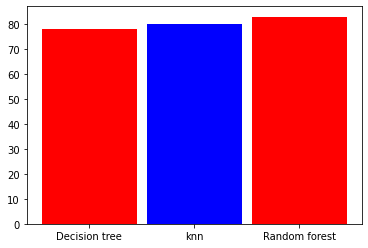

In [8]:
plt.bar(ticks, height, tick_label=tick_label, color=['r', 'b'], width=0.9)
plt.show()